In [34]:
import pandas as pd
import numpy as np
import janitor
import gc
import time
import matplotlib.pyplot as plt

### Overall turnout

#### All cities

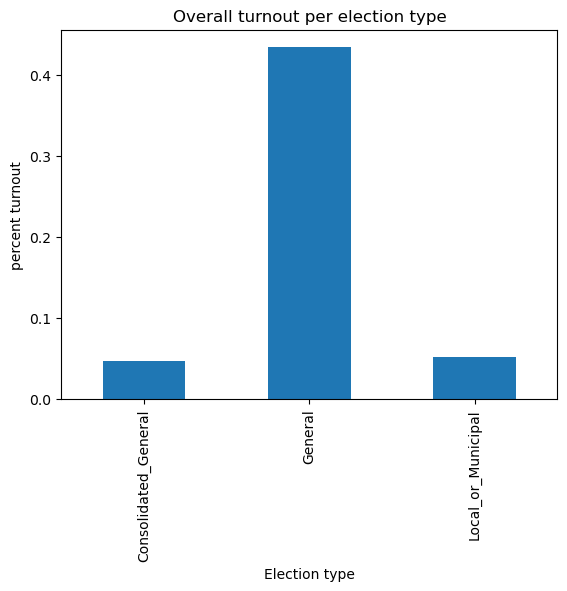

In [35]:
# one graph, with average voter turnout per election type
# read in new merged file for CA
path = '../data/VM2--CA--2022-04-25/'
data = pd.read_csv(path + 'voter_turnout_merged_CA.csv')

data['overall_turnout_perc'] = data['voted_voters'] / data['voter_population']

# group by election type, get average overall_turnout_perc

avg_turnout = data.groupby(['elec_type']).mean()['overall_turnout_perc']

avg_turnout.plot.bar(title='Overall turnout per election type', xlabel='Election type', ylabel='percent turnout')
plt.show()

#### RCV vs. Non-RCV cities

In [36]:
# separate data into RCV and non-RCV
RCV_cities_CA = ['San Francisco',
     'Oakland',
     'Berkeley',
     'San Leandro',
     'Palm Desert',
     'Eureka',
     'Albany']

nonRCV_cities_CA = ['Fresno',
     'San Diego',
     'Sacramento',
     'Riverside',
     'San Jose',
     'Santa Ana',
     'Anaheim',
     'Santa Rosa',
     'Merced',
     'Santa Clarita',
     'Alhambra',
     'Davis',
     'Montebello',
     'Burbank',
     'Huntington Park',
     'Bellflower',
     'Watsonville',
     'Gilroy',
     'Whittier',
     'Lynwood',
     'Lakewood',
     'Pico Rivera',
     'Lake Forest',
     'Livermore',
     'Chino Hills',
     'Paramount',
     'El Paso de Robles',
     'Pico Rivera',
     'Buena Park',
     'Whittier',
     'Calabasas',
     'Carpinteria',
     'Morro Bay',
     'San Carlos',
     'Solvang']


data_RCV = data[data['Residence_Addresses_City'].isin(RCV_cities_CA)]
data_nonRCV = data[data['Residence_Addresses_City'].isin(nonRCV_cities_CA)]
print(data_RCV.shape)
print(data_nonRCV.shape)

(48, 69)
(208, 69)


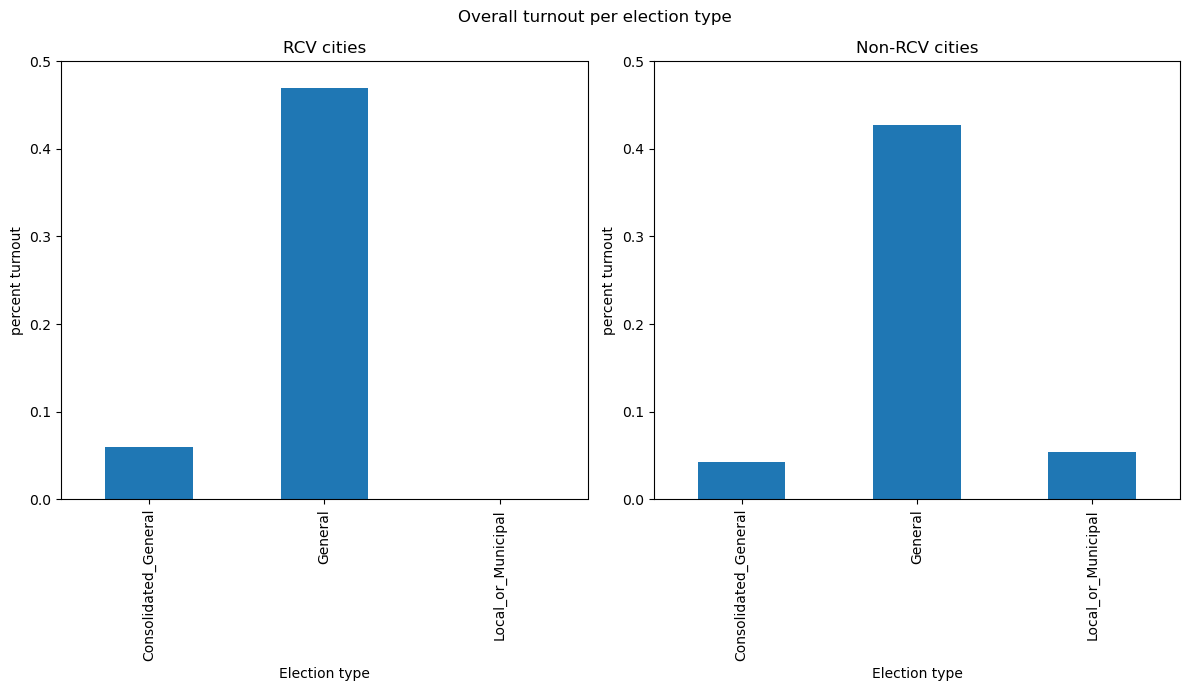

In [37]:
# get averages
avg_turnout_RCV = data_RCV.groupby(['elec_type']).mean()['overall_turnout_perc']
avg_turnout_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['overall_turnout_perc']

# subplots w both
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Overall turnout per election type')
fig.set_size_inches(12, 7)
avg_turnout_RCV.plot.bar(title='RCV cities', xlabel='Election type', ylabel='percent turnout', 
                         ax=ax1, ylim=[0,0.5])
avg_turnout_nonRCV.plot.bar(title='Non-RCV cities', xlabel='Election type', ylabel='percent turnout', 
                            ax=ax2, ylim=[0,0.5])
fig.tight_layout()


## Avg number of donations per person

Total number of donations per election, divided by voting population

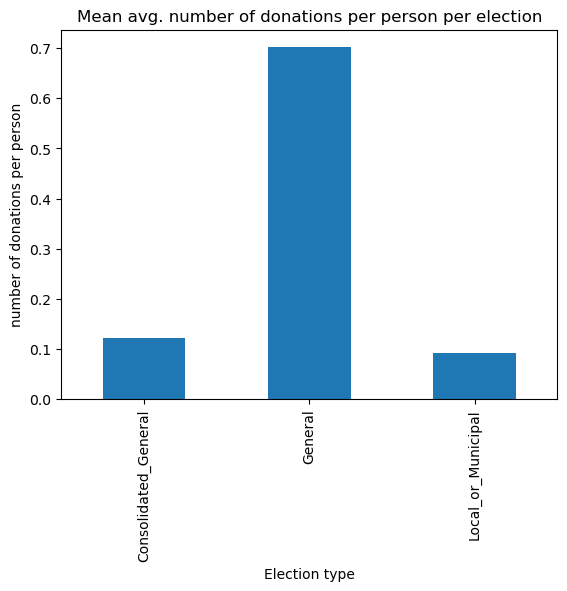

In [38]:
data['avg_donation_per_person'] = data['FECDonors_NumberOfDonations'] / data['voter_population']
avg_num_donations = data.groupby(['elec_type']).mean()['avg_donation_per_person']

avg_num_donations.plot.bar(title='Mean avg. number of donations per person per election', 
                           xlabel='Election type', ylabel='number of donations per person')


plt.show()

#### RCV vs. Non-RCV

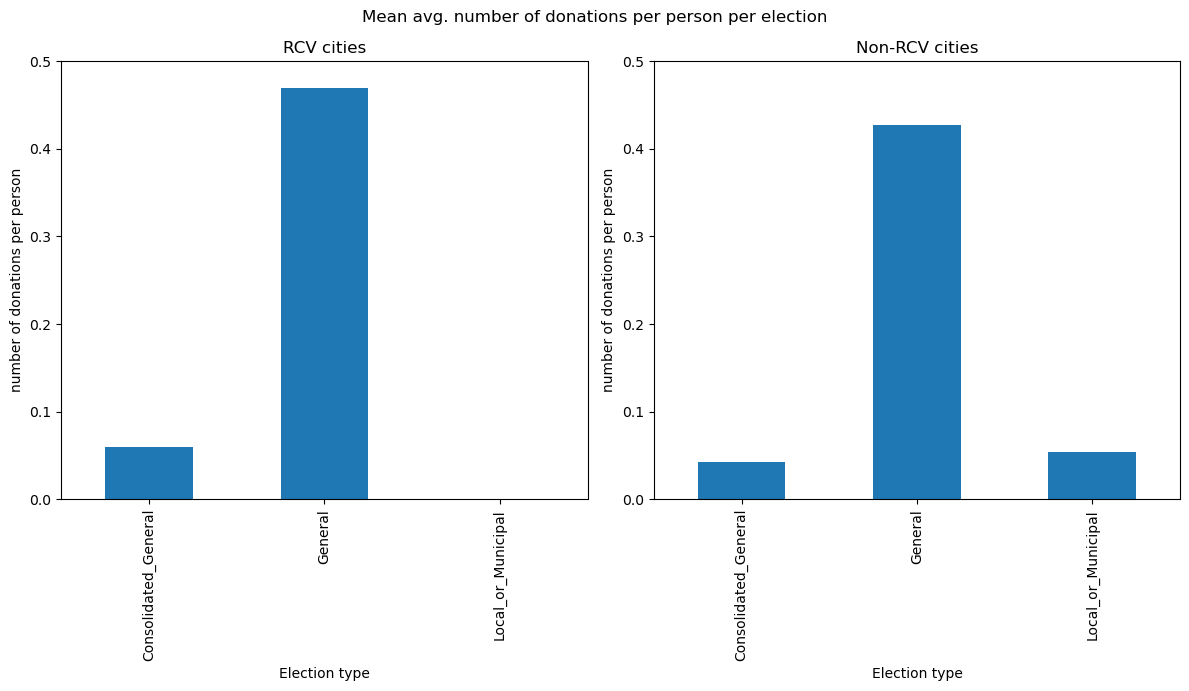

In [39]:
data_RCV = data[data['Residence_Addresses_City'].isin(RCV_cities_CA)]
data_nonRCV = data[data['Residence_Addresses_City'].isin(nonRCV_cities_CA)]

avg_num_donations_RCV = data_RCV.groupby(['elec_type']).mean()['avg_donation_per_person']
avg_num_donations_nonRCV = data_nonRCV.groupby(['elec_type']).mean()['avg_donation_per_person']

# subplots w both
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean avg. number of donations per person per election')
fig.set_size_inches(12, 7)
avg_turnout_RCV.plot.bar(title='RCV cities', xlabel='Election type', 
                         ylabel='number of donations per person', ax=ax1, ylim=[0, 0.5])
avg_turnout_nonRCV.plot.bar(title='Non-RCV cities', xlabel='Election type', 
                            ylabel='number of donations per person', ax=ax2, ylim=[0, 0.5])


fig.tight_layout()